In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [6]:
df=pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(60000, 785)

In [8]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth=6,n_estimators=200,min_samples_split=4,min_impurity_decrease=0.0)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=4, n_estimators=200)

In [12]:
y_pred=forest.predict(X_test)

In [13]:
y_pred

array([7, 3, 8, ..., 9, 7, 2])

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8881666666666667

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

2024-07-22 21:06:49.007134: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 21:06:49.007290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 21:06:49.196248: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
model=Sequential()
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [17]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8486 - loss: 5.0463 - val_accuracy: 0.9254 - val_loss: 0.2931
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9418 - loss: 0.2152 - val_accuracy: 0.9407 - val_loss: 0.2386
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9510 - loss: 0.1715 - val_accuracy: 0.9483 - val_loss: 0.1951
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9613 - loss: 0.1366 - val_accuracy: 0.9574 - val_loss: 0.1563
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9648 - loss: 0.1269 - val_accuracy: 0.9626 - val_loss: 0.1468
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9694 - loss: 0.1111 - val_accuracy: 0.9555 - val_loss: 0.1842
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9700 - loss: 0.1040 - val_accuracy: 0.9648 - val_loss: 0.1885
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9724 - loss: 0

In [18]:
model.evaluate(X_test,y_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9658 - loss: 0.1610


[0.1568336933851242, 0.9668333530426025]

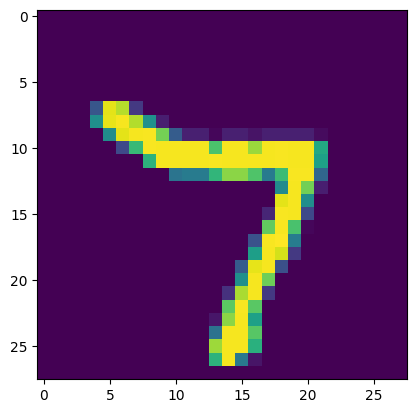

In [19]:
import matplotlib.pyplot as plt
plt.imshow(X_test.loc[12628].values.reshape(28,28))

In [20]:
model.predict(X_test.loc[12628].values.reshape(1,-1)).argmax(axis=1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


7

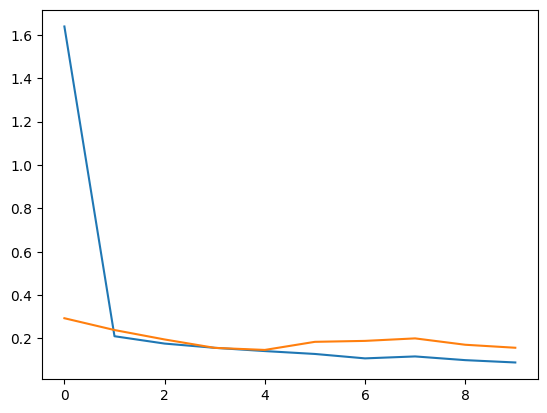

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

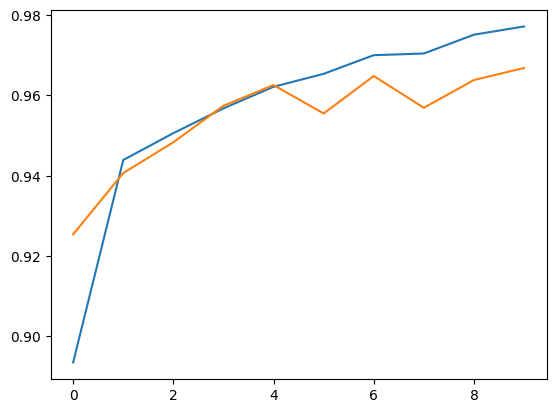

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])